Import important Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Read Dataset of the merged data

In [2]:
data = pd.read_csv('C:/Users/Fuad/Documents/Salam coding files/merged_data.csv', low_memory = False)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Creating columns for City

In [3]:
# Extract the city from the 'address' column and create a new 'city' column
data['City'] = data['Purchase Address'].str.split(',').str[1].str.strip()

data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",San Francisco
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Seattle
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Atlanta
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",San Francisco


Removing the columns with NaN values 

In [4]:
data = data.dropna().reset_index(drop=True)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles


Create a Month Column

In [5]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M')

# Extract the month from the 'date' column and create a new 'month' column
data['Month'] = data['Order Date'].dt.strftime('%b')


data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,Apr
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,Apr
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Apr
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Apr
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,Apr


Sorting the data according to the months

In [6]:

data1= data.sort_values(by = 'Order Date', ascending= True)
data1 = data1.reset_index(drop = True)
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",New York City,Jan
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",San Francisco,Jan
2,149343,Apple Airpods Headphones,1,150,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",New York City,Jan
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Dallas,Jan
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Atlanta,Jan


Convert the Prices into a Float

In [7]:
data1['Price Each'] = data1['Price Each'].astype(float)
data1['Quantity Ordered'] = data1['Quantity Ordered'].astype(float)
data1.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",New York City,Jan
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",San Francisco,Jan
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",New York City,Jan
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Dallas,Jan
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Atlanta,Jan


Group by Months the find out the total prices of each month 

In [8]:
sums = data1[['Month', 'Price Each']]
sums = sums.rename(columns= {'Price Each' : 'Total Price'})
sums = sums.groupby('Month', as_index=False).sum()

sums

,Month,Total Price
0,Apr,3367671.02
1,Aug,2230345.42
2,Dec,4588415.41
3,Feb,2188884.72
4,Jan,1811768.38
5,Jul,2632539.56
6,Jun,2562025.61
7,Mar,2791207.83
8,May,3135125.13
9,Nov,3180600.68


Total  per Price per Month on a Chart

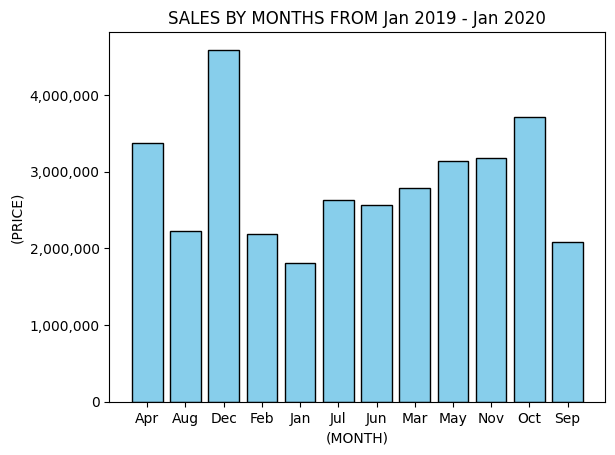

In [9]:
import matplotlib.ticker as ticker

#Create the Bars
plt.bar(sums['Month'], sums['Total Price'], color = 'skyblue', edgecolor = 'black')


#Adding labels and title
plt.xlabel('(MONTH)')
plt.ylabel('(PRICE)')
plt.title('SALES BY MONTHS FROM Jan 2019 - Jan 2020')

#Make the yaxis values in 10s
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,p : f'{int(x):,}'))

#Displaying the graph
plt.show()

Group by City to find out which sold the most products

In [10]:
city = data1[['City', 'Quantity Ordered']]
city = city.rename(columns= {'Quantity Ordered' : 'Total Qty  Ordered'})
city = city.groupby('City', as_index=False).sum()
city

,City,Total Qty Ordered
0,Atlanta,16602.0
1,Austin,11153.0
2,Boston,22528.0
3,Dallas,16730.0
4,Los Angeles,33289.0
5,New York City,27932.0
6,Portland,14053.0
7,San Francisco,50239.0
8,Seattle,16553.0


Total Prices by City on a Chart

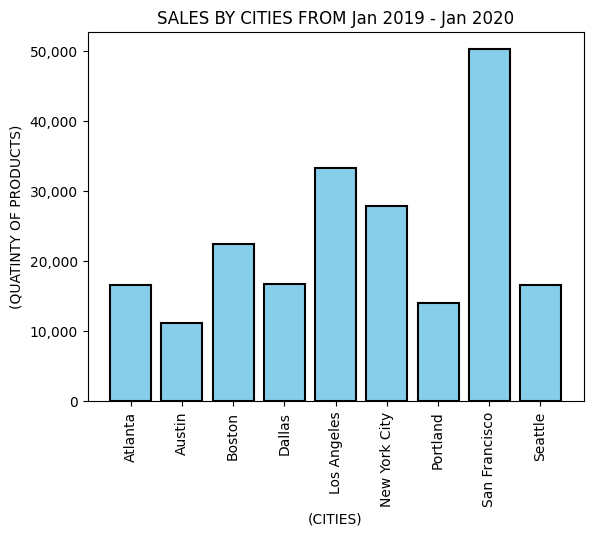

In [11]:
#Create the Bars
plt.bar(city['City'], city['Total Qty  Ordered'], color = 'skyblue', edgecolor = 'black', linewidth = 1.5)


#Adding labels and title
plt.xlabel('(CITIES)')
plt.ylabel('(QUATINTY OF PRODUCTS)')
plt.title('SALES BY CITIES FROM Jan 2019 - Jan 2020')

plt.xticks(city['City'], rotation = 'vertical')
#Make the yaxis values in 10s
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,p : f'{int(x):,}'))

#Displaying the graph
plt.show()

Create a Column for Hour 

In [22]:
data1['Time (Hr)'] = data1['Order Date'].dt.hour

data1.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Time (Hr)
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",New York City,Jan,3
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",San Francisco,Jan,3
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",New York City,Jan,4
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Dallas,Jan,5
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Atlanta,Jan,6


Determine what time most order made 

In [47]:
time = data1[['Time (Hr)', 'Quantity Ordered']]
time = time.rename(columns= {'Quantity Ordered' : 'Total Qty Ordered'})

time = time.groupby(['Time (Hr)'], as_index= False).sum()
time

,Time (Hr),Total Qty Ordered
0,0,4428.0
1,1,2619.0
2,2,1398.0
3,3,928.0
4,4,937.0
5,5,1493.0
6,6,2810.0
7,7,4556.0
8,8,7002.0
9,9,9816.0


Display the sales during respective time

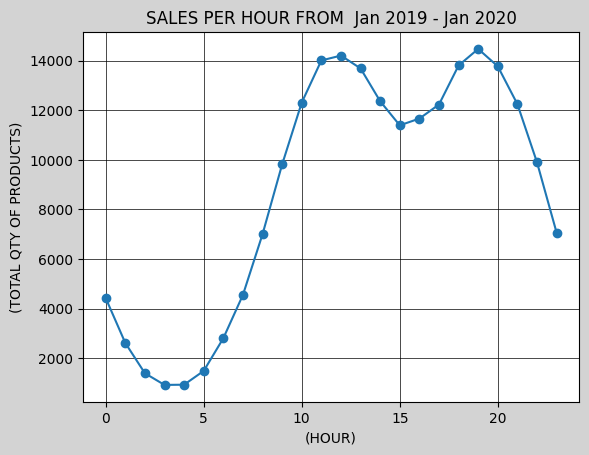

In [62]:

fig = plt.figure(facecolor='lightgray')

plt.plot(time['Time (Hr)'], time['Total Qty Ordered'], 'o', linestyle = 'solid')
plt.grid(True, linewidth = 0.5, color = 'black')
#Label the Graph
plt.xlabel('(HOUR)')
plt.ylabel('(TOTAL QTY OF PRODUCTS)')
plt.title('SALES PER HOUR FROM  Jan 2019 - Jan 2020')


#Displaying the graph
plt.show()

In [112]:
prod1 = data.head(10)
prod1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,Apr
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,Apr
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Apr
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Apr
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,Apr
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",San Francisco,Apr
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",Seattle,Apr
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",Atlanta,Apr
8,176565,Macbook Pro Laptop,1,1700,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",San Francisco,Apr
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",Boston,Apr


In [113]:
prod = prod1[['Product', 'Order Date']]


,Product,Order Date
0,USB-C Charging Cable,2019-04-19 08:46:00
1,Bose SoundSport Headphones,2019-04-07 22:30:00
2,Google Phone,2019-04-12 14:38:00
3,Wired Headphones,2019-04-12 14:38:00
4,Wired Headphones,2019-04-30 09:27:00
5,USB-C Charging Cable,2019-04-29 13:03:00
6,Bose SoundSport Headphones,2019-04-02 07:46:00
7,USB-C Charging Cable,2019-04-12 10:58:00
8,Macbook Pro Laptop,2019-04-24 10:38:00
9,Wired Headphones,2019-04-08 14:05:00


In [114]:
prod = prod.groupby(['Order Date'], as_index = False).sum()
prod

,Order Date,Product
0,2019-04-02 07:46:00,Bose SoundSport Headphones
1,2019-04-07 22:30:00,Bose SoundSport Headphones
2,2019-04-08 14:05:00,Wired Headphones
3,2019-04-12 10:58:00,USB-C Charging Cable
4,2019-04-12 14:38:00,Google PhoneWired Headphones
5,2019-04-19 08:46:00,USB-C Charging Cable
6,2019-04-24 10:38:00,Macbook Pro Laptop
7,2019-04-29 13:03:00,USB-C Charging Cable
8,2019-04-30 09:27:00,Wired Headphones


Determine the most sold product

In [ ]:
product = data1[['Product','Quantity Ordered']]
product = product.rename(columns= {'Quantity Ordered' : 'Total Qty  Ordered'})
product = product.groupby(['Product'], as_index= False).sum()

product

,Product,Total Qty Ordered
0,20in Monitor,4129.0
1,27in 4K Gaming Monitor,6244.0
2,27in FHD Monitor,7550.0
3,34in Ultrawide Monitor,6199.0
4,AA Batteries (4-pack),27635.0
5,AAA Batteries (4-pack),31017.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
8,Flatscreen TV,4819.0
9,Google Phone,5532.0
